В этом блокноте мы обсудим дискретное двумерное вейвлет преобразование (DWT), увидим, как оно может использоваться для сжатия изображений.
Для начала установим необходимую версию библиотеки и подключим то, чем будем пользоватья в дальнейшем.


In [ ]:
!pip install opencv-python==4.4.0.42

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv-python-4.4.0.42.tar.gz (88.9 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

Покажем отличия от исходного:

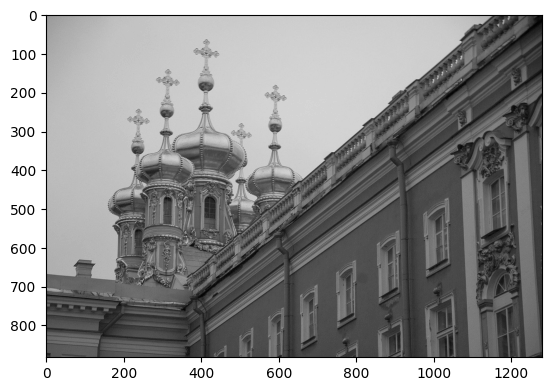

In [ ]:
#1-2
img_1 = cv2.imread('1.jpg')
img_gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray_1,cmap='gray');

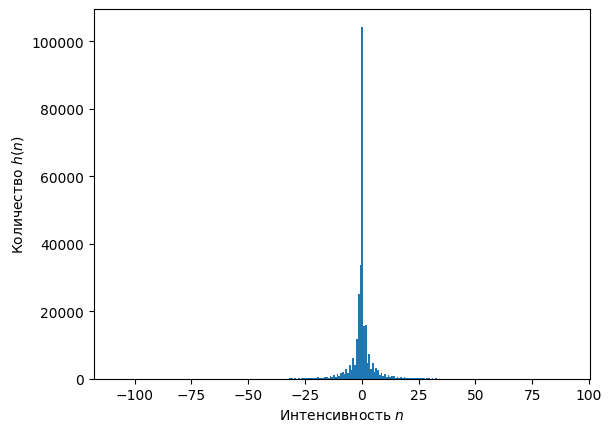

h(n):  104371.0
n:  -0.220703125


In [ ]:
#3
wavelet = 'haar'
c = pywt.dwt2(img_gray_1,wavelet)
cA, (cH, cV, cD)= c

cD_hist = plt.hist(cD.ravel(), bins = 256)
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество $h(n)$')
plt.show()

x, y, _ = cD_hist
dict = {}
for i in range(len(x)):
  dict[x[i]] = y[i]
print('h(n): ', max(dict.keys()))
print('n: ', dict[max(dict.keys())])

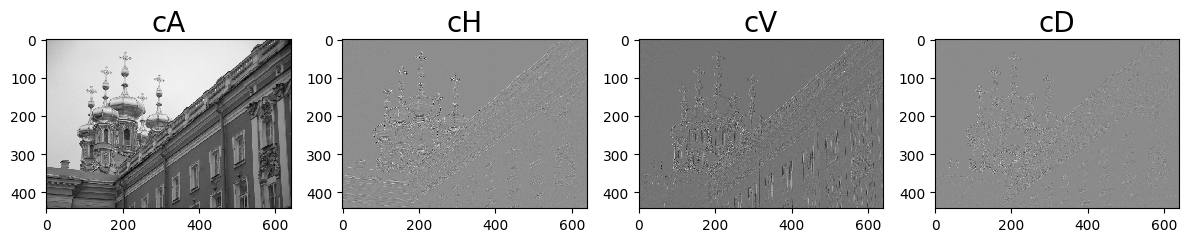

In [ ]:
# img_2 = cv2.imread('2.jpg')
# img_3 = cv2.imread('3.jpg')
# img_4 = cv2.imread('4.jpg')
# img_5 = cv2.imread('5.jpg')

titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

1. С помощью библиотеки OpenCV считайте изображение.
2. Выполните вейвлет-преобразование Хаара.
3. Выполните повторное вейвлет-преобразование Хаара для набора cA.
4. Обнулите коэффициенты меньшие по модулю значения threshold = 40 набора cA1. Введите количество таких коэффициентов:
5. Сохраните или отобразите полученное изображение.

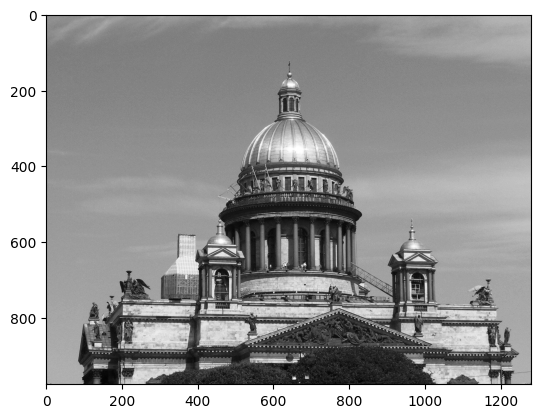

In [ ]:
#1.

img_6 = cv2.imread('6.jpg')
image = cv2.cvtColor(img_6, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray');

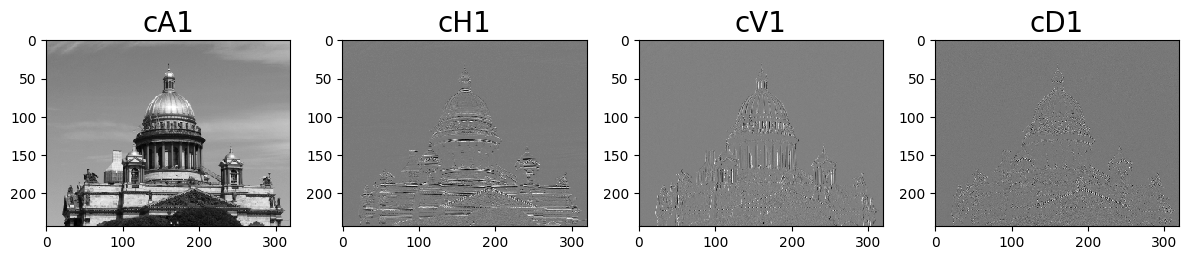

In [ ]:
wavelet = 'haar'
cA = pywt.dwt2(image, wavelet)[0]

c = pywt.dwt2(cA,wavelet)
cA1, (cH1, cV1, cD1) = c
titles = ['cA1', 'cH1', 'cV1', 'cD1']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA1, cH1, cV1, cD1]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()

In [ ]:
threshold = 40
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      c[0][i][np.abs(c[0][i])<threshold] = 0.0 # для cA
print('Количество нулей =',(sum(sum(c[0][m] == 0) for m in range(h1))))

Количество нулей = 45


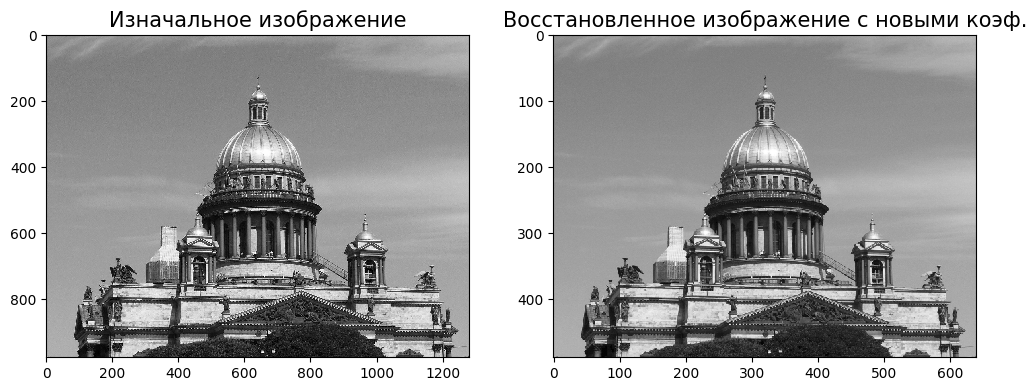

In [ ]:
c_inverse1 = pywt.idwt2((c),wavelet)#[:h,:w]  # коэф. с обнулены в предыдущем строке
titles1 = ['Изначальное изображение', 'Восстановленное изображение c новыми коэф.']
fig1 = plt.figure(figsize=(12, 6))
for i, a in enumerate([image, c_inverse1]):
  ax = fig1.add_subplot(1, 2, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles1[i], fontsize=15)
fig.tight_layout()
plt.show()

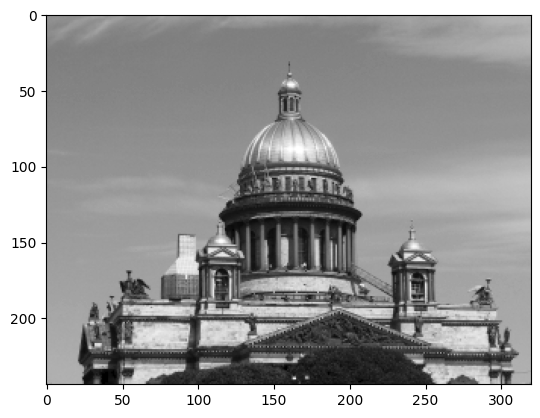

In [ ]:
plt.imshow(c[0], cmap='gray');

In [ ]:
cv2.imwrite('1111.jpg', c[0])

SyntaxError: ignored

Разницу изображений я искал вот на этом сайте
https://www.imgonline.com.ua/difference-between-two-images.php